# 最適経済成長理論の基本モデル

(http://quant-econ.net/jl/dp_intro.html より)

## 定式化

次のような動学的最適化問題を考える．

* 離散時間 $t = 0, 1, 2, \ldots$
* 各期初の資本 $k_t$ を用いて生産が行われ $f(k_t)$ だけの産出量を得る．
* そのうち $c_t$ 分だけ消費し，残り $f(k_t) - c_t$ を来期に回す ($k_{t+1}$ になる)．
* $k_0$ は所与．
* 消費 $c_t$ から $u(c_t)$ だけの効用を得る．
* 将来の効用は割引因子 $\beta \in (0, 1)$ で割り引かれる．
  第 $t$ 期の消費 $c_t$ の現在価値は $\beta^t u(c_t)$．

消費からの効用の現在価値の総和を最大にするような消費経路は何か．

数式で書くと：
$$
\begin{align*}
    &\max_{\{c_t\}_{t=0}^{\infty}} \sum_{t=0}^{\infty} \beta^t u(c_t) \\\\
    &\ \text{ s.t. }\ k_{t+1} = f(k_t) - c_t,\quad
     \text{$k_0$: given}
\end{align*}
$$

目的関数の最大値を初期条件 $k_0$ の関数として $v^*(k_0)$ と書く
(最適解の存在を保証する条件が満たされていると暗黙に仮定)．  
この関数 $v^*$ を最適価値関数 (optimal value function)，あるいは単に価値関数という．

## Bellman の最適性原理 (動的計画法の原理)

* 実は，ある関数 $\sigma\colon k_t \mapsto c_t$ が存在して最適消費経路は
  $$
  \sigma(k_0), \sigma(k_1), \sigma(k_2), \ldots
  $$
  で与えられる．
  そのような関数 $\sigma$ を最適政策関数 (optimal policy function)，あるいは単に最適政策という．
* 価値関数 $v^*$ は関数方程式 (Bellman 方程式)
  $$
  v(k) = \max_{c} u(c) + \beta v(f(k) - c)
  $$
  の解である．
* 各 $k$ に対して，最適政策の値 $\sigma(k)$ は (静学的な) 最大化問題
  $$
  \max_{c} u(c) + \beta v^*(f(k) - c)
  $$
  の解になっている．
* よって，価値関数 $v^*$ が求まればよい．

## Bellman Operator

* 価値関数 $v^*$ は，Bellman operator と呼ばれる汎関数 (関数を関数に写す関数)
  $$
  T(v)(k) = \max_c u(c) + \beta v(f(k) - c)
  $$
  の不動点 (fixed point) である．
* Bellman operator $T$ は，$\beta \in (0, 1)$ を係数とする縮小写像 (contraction mapping) である．
* したがって，$v^*$ は $T$ の唯一の不動点であり，また，任意の関数 $v_0$ に対して関数列
  $$
  T(v_0), T(T(v_0)), T(T(T(v_0))), \ldots
  $$
  の一様収束先になっている．
* つまり，適当に初期関数 $v_0$ を決めてそれに繰り返し $T$ を施していけば $v^*$ (の近似) が求まる
  ("value iteration")．

## `QuantEcon.jl` を使って解く

In [1]:
using QuantEcon, QuantEcon.Models
using PyPlot

INFO: Loading help data...


具体的な関数形として
* $f(k) = k^{\alpha}, \quad \alpha = 0.65$
* $u(c) = \log c$

を用いる．  
(実は，このケースは手で解ける．)

また $\beta = 0.95$ とする．

In [2]:
# Production function
a = 0.65
f(k) = k^a

# Instantaneous utility function
u(c) = log(c)

# Discount factor
b = 0.95

0.95

モデル上は状態 (資本量) $k$ は連続変数だが，数値計算のためには離散化しないといけない．

In [3]:
# Grid
# grid_min = 1e-6
grid_max = 2
grid_size = 150

150

`QuantEcon.Models` の `GrowthModel` タイプのインスタンスを作る：

In [4]:
gm = GrowthModel(f, b, u, grid_max, grid_size)

GrowthModel(f,0.95,u,2,150,1.0e-6:0.013422812080536913:2.0)

`bellman_operator` メソッドは (その名の通り) Bellman operator を生成する：

(モデル上は $v$ は連続変数についての関数だが，ここでは長さ `grid_size` の配列．
内部で線形補間を行っている．)

In [5]:
T(v) = bellman_operator(gm, v)

T (generic function with 1 method)

Value iteration によって価値関数 $v^*$ を求める．

`compute_fixed_point` は初期関数 `v_0` に operator `T` を何度も (最大 `max_iter` 回) 施す．  
変化分が `err_tol` (デフォルト値 `1e-3`) 以下になったら止まる．

In [6]:
v_0 = zeros(grid_size)
v_star = compute_fixed_point(T, v_0, max_iter=200)

Compute iterate 10 with error 5.664717534847441
Compute iterate 20 with error 3.3916756352375614
Compute iterate 30 with error 2.0307214868152528
Compute iterate 40 with error 1.2148385533285193
Compute iterate 50 with error 0.7232659896269524
Compute iterate 60 with error 0.4292608955834396
Compute iterate 70 with error 0.25433714483060044
Compute iterate 80 with error 0.15055392764998032
Compute iterate 90 with error 0.08907378584103753
Compute iterate 100 with error 0.05268491633597705
Compute iterate 110 with error 0.031157353832242052
Compute iterate 120 with error 0.018424987689257932
Compute iterate 130 with error 0.010895480445753947
Compute iterate 140 with error 0.006443027256182177
Compute iterate 150 with error 0.003810175465417842
Compute iterate 160 with error 0.002253282258351419
Compute iterate 170 with error 0.001332613970021157
Converged in 176 steps


150-element Array{Float64,1}:
 -179.345 
  -42.127 
  -40.9424
  -40.2484
  -39.7556
  -39.3758
  -39.0661
  -38.8042
  -38.5773
  -38.3772
  -38.198 
  -38.0355
  -37.8871
    ⋮     
  -33.7352
  -33.7229
  -33.7108
  -33.6986
  -33.6866
  -33.6747
  -33.6628
  -33.651 
  -33.6393
  -33.6277
  -33.6161
  -33.6047

価値関数 $v^*$ の様子：

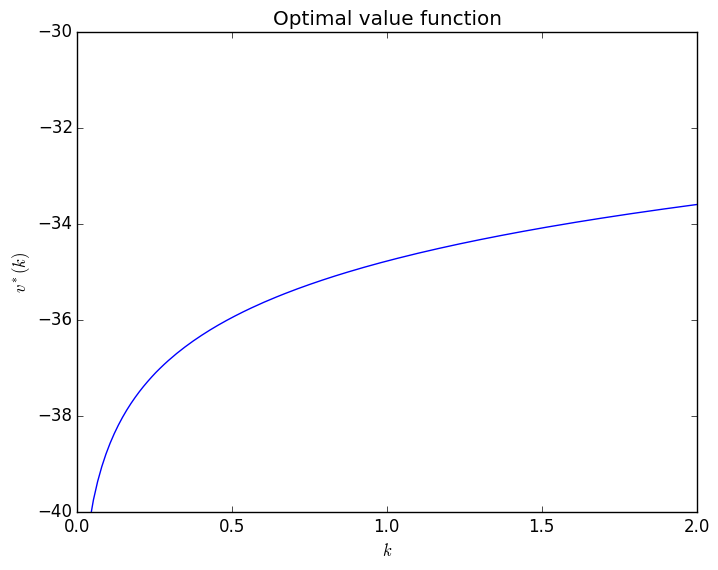

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x119db9290>

In [7]:
fig, ax = subplots()
ax[:set_title]("Optimal value function")
ax[:set_xlabel]("\$k\$")
ax[:set_ylabel]("\$v^*(k)\$")
ax[:set_ylim](-40, -30)
ax[:plot](gm.grid, v_star)

最適政策 $\sigma$ を求める．  
`bellman_operator` は `ret_policy=true` とすると max の代わりに argmax を返す．

In [8]:
sigma = bellman_operator(gm, v_star, ret_policy=true)

150-element Array{Float64,1}:
 0.00010297
 0.0204209 
 0.0372028 
 0.0456173 
 0.0554709 
 0.0653724 
 0.073685  
 0.0807593 
 0.0869278 
 0.0952353 
 0.103795  
 0.11243   
 0.117268  
 ⋮         
 0.566688  
 0.57371   
 0.577087  
 0.577087  
 0.58125   
 0.585162  
 0.585162  
 0.588636  
 0.590912  
 0.590912  
 0.595871  
 0.602725  

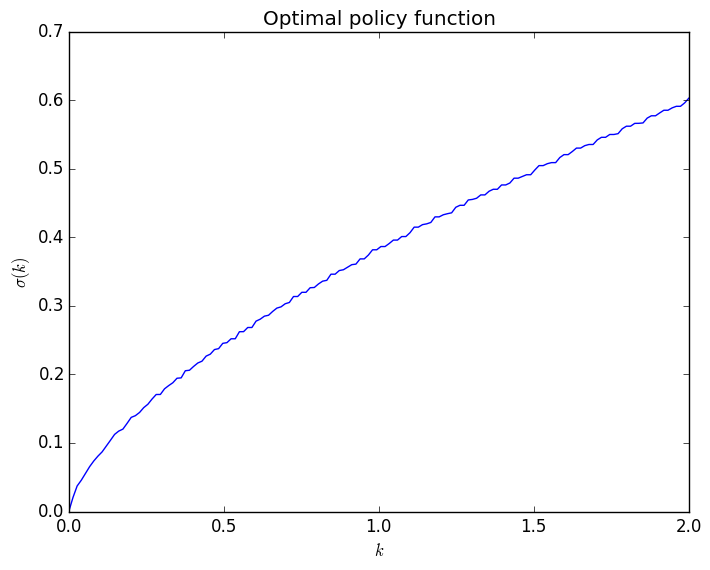

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11a415f50>

In [9]:
fig, ax = subplots()
ax[:set_title]("Optimal policy function")
ax[:set_xlabel]("\$k\$")
ax[:set_ylabel]("\$\\sigma(k)\$")
ax[:plot](gm.grid, sigma)

最後に，最適政策 $\sigma$ の下での資本量の推移を見る．  
(`sigma` は長さ `grid_size` の配列．
補間しないといけない．)

In [10]:
using Grid: CoordInterpGrid, BCnan, InterpLinear

sigma_interpolated =
    CoordInterpGrid(gm.grid, sigma, BCnan, InterpLinear)

series_length = 25

k = Array(Float64, series_length)
k[1] = 0.1

for t=1:series_length-1
    k[t+1] = gm.f(k[t]) - sigma_interpolated[k[t]]
end

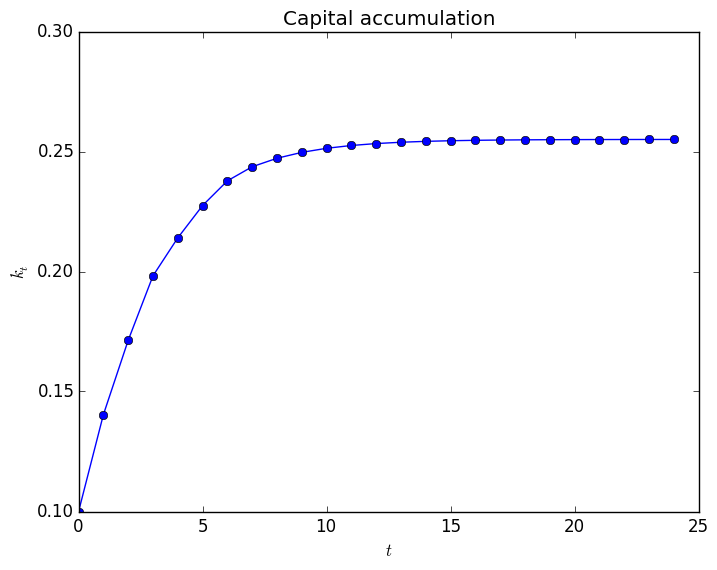

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11a845d90>

In [11]:
fig, ax = subplots()
ax[:set_title]("Capital accumulation")
ax[:set_xlabel]("\$t\$")
ax[:set_ylabel]("\$k_t\$")
ax[:set_ylim](0.1, 0.3)
ax[:plot](0:series_length-1, k, "o-")